In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn3
from matplotlib_venn import venn2

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

# color-blind safe color scheme from https://personal.sron.nl/~pault/#fig:scheme_bright
blue, cyan, green, yellow = "#4477AA", "#66CCEE", "#228833", "#CCBB44"
red, purple, grey, black = "#EE6677", "#AA3377", "#BBBBBB", "#333333"

# 翻訳効率解析 by deltaTE
`DESeq2`を用いて翻訳効率を解析する`deltaTE`の結果を可視化。まず遺伝子発現の制御モードを区別する関数`regulation()`を作成。

In [2]:
def regulation(df):
    if df["gene"] in intensified:
        return "intensified"
    elif df["gene"] in forwarded:
        return "forwarded"
    elif df["gene"] in exclusive:
        return "exclusive"
    elif df["gene"] in buffered:
        return "buffered"
    else:
        return "ns"

# データの読み込み
全リードを`df1`に、T>Cリードを`df2`に格納

In [5]:
read_type = "all"

path = "../rscript/deltaTE/" + read_type + "/Results/gene_lists/"
input_total = "../rscript/deltaTE/" + read_type + "/Results/fold_changes/deltaRNA.txt"
input_trap = "../rscript/deltaTE/" + read_type + "/Results/fold_changes/deltaRibo.txt"

# set color and order
color = {"ns":grey, "forwarded":cyan, "buffered":purple, "exclusive":red, "intensified":blue}
plot_order = {"ns":0, "forwarded":1, "buffered":2, "exclusive":3, "intensified":4}
hue_order = ["intensified", "forwarded", "exclusive", "buffered", "ns"]

with open(path + "intensified.txt") as f:
    intensified = f.read().splitlines()
    
with open(path + "forwarded.txt") as f:
    forwarded = f.read().splitlines()

with open(path + "exclusive.txt") as f:
    exclusive = f.read().splitlines()
    
with open(path + "buffered.txt") as f:
    buffered = f.read().splitlines()
    
print(f"""# Regulation type
Intensified genes: {len(intensified)}
Forwarded genes: {len(forwarded)}
Exclusive genes: {len(exclusive)}
Buffered genes: {len(buffered)} """)

df_total = pd.read_csv(input_total, sep="\t")[["log2FoldChange", "padj"]]
df_trap = pd.read_csv(input_trap, sep="\t")[["log2FoldChange", "padj"]]
df = pd.merge(df_total, df_trap, left_index=True, right_index=True ).dropna()
df.columns = ["log2FC_total", "padj_total", "log2FC_trap", "padj_trap"]

df["gene"] = df.index
df["regulation"] = df.apply(regulation, axis=1)

print(f"Analyzed genes: {len(df)}")

 # reorder df
df["plot_order"] = df["regulation"].map(plot_order)
df1 = df.sort_values("plot_order")

df1.to_csv("../resulted_csv/deltaTE_All.csv")

df1.head()

# Regulation type
Intensified genes: 34
Forwarded genes: 519
Exclusive genes: 160
Buffered genes: 68 
Analyzed genes: 9932


,log2FC_total,padj_total,log2FC_trap,padj_trap,gene,regulation,plot_order
A1BG,0.129031,0.391584,-0.002878,0.992853,A1BG,ns,0
PSMC6,0.011503,0.964726,0.453180,0.064872,PSMC6,ns,0
PSMD10,-0.248609,0.142747,-0.104037,0.699673,PSMD10,ns,0
PSMD11,-0.087796,0.347502,0.064097,0.631838,PSMD11,ns,0
PSMD12,0.069425,0.587344,0.115370,0.476360,PSMD12,ns,0


In [6]:
read_type = "tc"

path = "../rscript/deltaTE/" + read_type + "/Results/gene_lists/"
input_total = "../rscript/deltaTE/" + read_type + "/Results/fold_changes/deltaRNA.txt"
input_trap = "../rscript/deltaTE/" + read_type + "/Results/fold_changes/deltaRibo.txt"

# set color and order
color = {"ns":grey, "forwarded":cyan, "buffered":purple, "exclusive":red, "intensified":blue}
plot_order = {"ns":0, "forwarded":1, "buffered":2, "exclusive":3, "intensified":4}
hue_order = ["intensified", "forwarded", "exclusive", "buffered", "ns"]

with open(path + "intensified.txt") as f:
    intensified = f.read().splitlines()
    
with open(path + "forwarded.txt") as f:
    forwarded = f.read().splitlines()

with open(path + "exclusive.txt") as f:
    exclusive = f.read().splitlines()
    
with open(path + "buffered.txt") as f:
    buffered = f.read().splitlines()
    
print(f"""# Regulation type
Intensified genes: {len(intensified)}
Forwarded genes: {len(forwarded)}
Exclusive genes: {len(exclusive)}
Buffered genes: {len(buffered)} """)

df_total = pd.read_csv(input_total, sep="\t")[["log2FoldChange", "padj"]]
df_trap = pd.read_csv(input_trap, sep="\t")[["log2FoldChange", "padj"]]
df = pd.merge(df_total, df_trap, left_index=True, right_index=True ).dropna()
df.columns = ["log2FC_total", "padj_total", "log2FC_trap", "padj_trap"]

df["gene"] = df.index
df["regulation"] = df.apply(regulation, axis=1)

print(f"Analyzed genes: {len(df)}")

 # reorder df
df["plot_order"] = df["regulation"].map(plot_order)
df2 = df.sort_values("plot_order")

df2.to_csv("../resulted_csv/deltaTE_TC.csv")

df2.head()

# Regulation type
Intensified genes: 17
Forwarded genes: 347
Exclusive genes: 103
Buffered genes: 15 
Analyzed genes: 9724


,log2FC_total,padj_total,log2FC_trap,padj_trap,gene,regulation,plot_order
AAAS,0.040046,0.863732,0.542675,0.165287,AAAS,ns,0
QRSL1,0.185928,0.435126,-0.236036,0.442570,QRSL1,ns,0
QSER1,-0.104637,0.683460,-0.226815,0.374234,QSER1,ns,0
QSOX1,-0.162560,0.459305,0.048823,0.839598,QSOX1,ns,0
QSOX2,0.003282,0.994176,0.037773,0.916739,QSOX2,ns,0


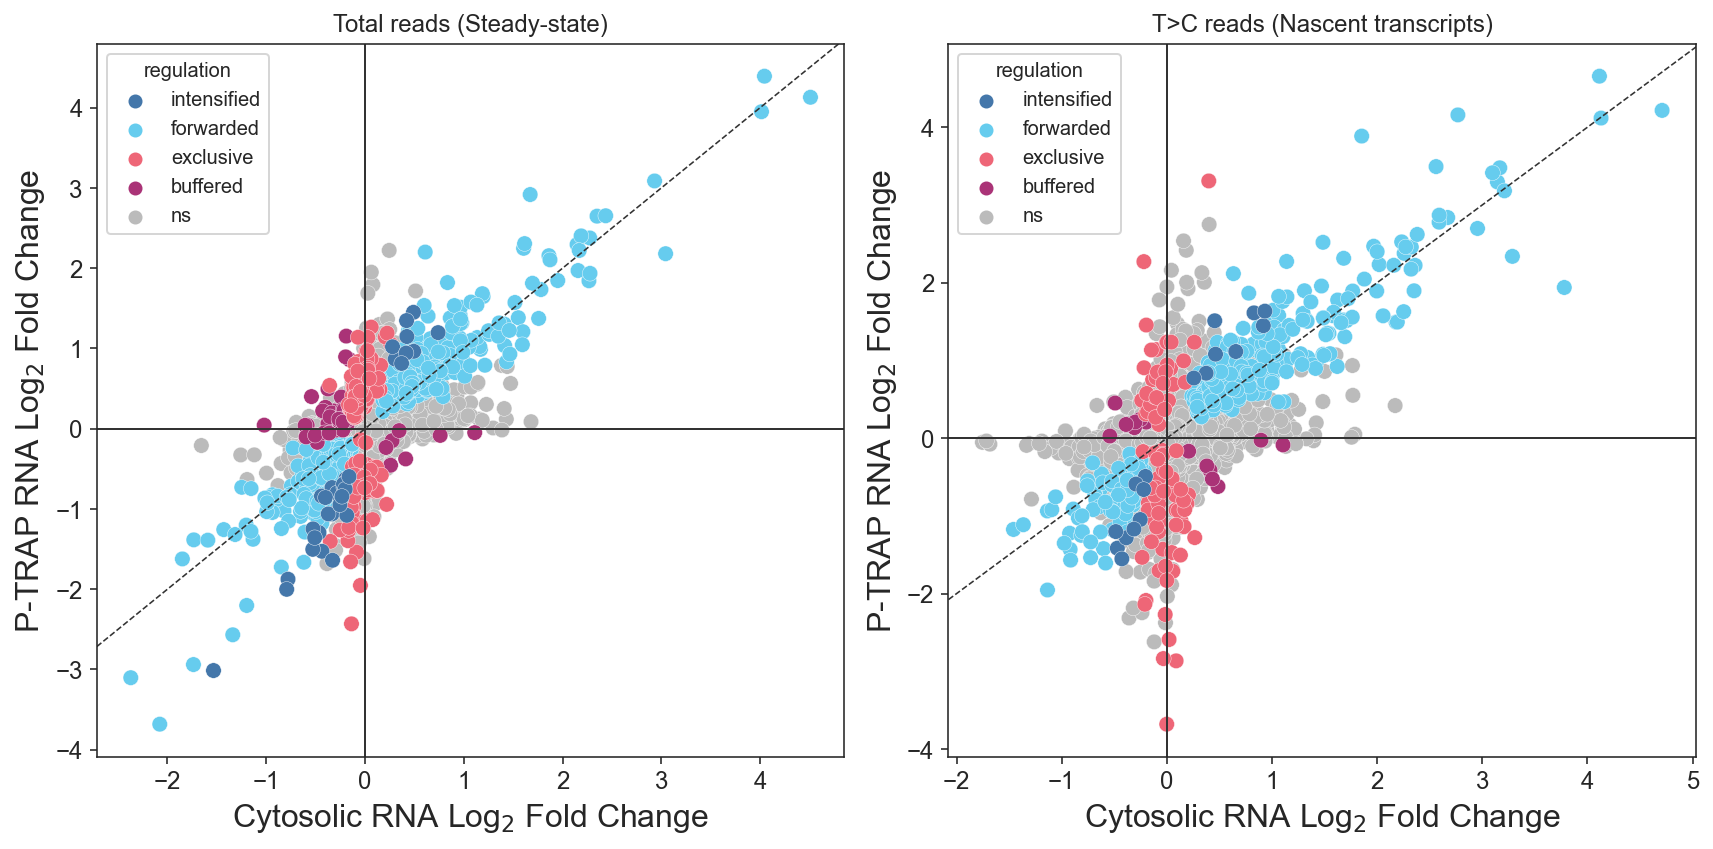

In [7]:
# subplot
sns.set_style("ticks")
fig = plt.figure(figsize=(12, 6), tight_layout=True)
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)

# set color and order
color = {"ns":grey, "forwarded":cyan, "buffered":purple, "exclusive":red, "intensified":blue}
plot_order = {"ns":0, "forwarded":1, "buffered":2, "exclusive":3, "intensified":4}
hue_order = ["intensified", "forwarded", "exclusive", "buffered", "ns"]

# plot scatters
sns.scatterplot(data=df1, x="log2FC_total", y="log2FC_trap", hue="regulation",
                            ax=ax1, palette=color, hue_order=hue_order, alpha=1, s=60, linewidth=0.2)

# plot scatters
sns.scatterplot(data=df2, x="log2FC_total", y="log2FC_trap", hue="regulation",
                            ax=ax2, palette=color, hue_order=hue_order, alpha=1, s=60, linewidth=0.2)

# plot lines 
x = y = list(ax1.get_xlim())
ax1.plot(x, y, linestyle="--", color=black, lw=0.8, scalex=False, scaley=False)

# plot lines 
x = y = list(ax2.get_xlim())
ax2.plot(x, y, linestyle="--", color=black, lw=0.8, scalex=False, scaley=False)

# set ax
ax1.set_title("Total reads (Steady-state)")
ax1.axhline(0, -40, 40, color=black, linewidth=1)
ax1.axvline(0, -40, 40, color=black, linewidth=1)
ax1.tick_params(direction="out", labelsize=12)
ax1.set_xlabel("Cytosolic RNA Log" + "$_{2}$" + " Fold Change", fontsize=16)
ax1.set_ylabel("P-TRAP RNA Log" + "$_{2}$" + " Fold Change", fontsize=16)

# set ax
ax2.set_title("T>C reads (Nascent transcripts)")
ax2.axhline(0, -40, 40, color=black, linewidth=1)
ax2.axvline(0, -40, 40, color=black, linewidth=1)
ax2.tick_params(direction="out", labelsize=12)
ax2.set_xlabel("Cytosolic RNA Log" + "$_{2}$" + " Fold Change", fontsize=16)
ax2.set_ylabel("P-TRAP RNA Log" + "$_{2}$" + " Fold Change", fontsize=16)

fig.savefig("../figure_6/Scatterplot_deltaTE.pdf", bbox_inches="tight", transparent=True)